# Motive of Project:

The objective is to detect hate in the tweet. We can say that if there is a racist or sexcist comment associated with the tweet
then we label it as racist or sexcist(ie negative) and all others as not racist or not sexicist(ie positive).

The given data has labelled -ve tweets as "1" and +ve tweets as "0". And our task is to label the test data.

We provide the model with more than 31 thousand tweets for taining purposes and in each dataset we have tweet id, tweet label and the tweet itself.

# Import Modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')#if the algo finds the matching warning... it will ignore it...


# Loading Dataset


In [2]:
df=pd.read_csv('train_tweets.csv')
df.drop(range(2000,len(df)), axis=0, inplace=True)
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
1995,1996,0,sho film i made on my relationship with caffei...
1996,1997,0,@user one the flowers i planted as a seed blo...
1997,1998,1,@user riyadh is renowned for some of the deadl...
1998,1999,0,@user ooohhh. im busy with my internship here ...


In [3]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   label   2000 non-null   int64 
 2   tweet   2000 non-null   object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


# Preprocessing


In [4]:
#so there is no null value... so need of imputer

In [5]:
#removing @user from every tweet
new=re.compile('@user*')
another=re.compile('[-,?!(){},:;|0-9]')#removing all other useless characters
df['clean_tweet']=df['tweet']
j=0
for sentences in df['clean_tweet']:
    df['clean_tweet'][j]=new.sub("",sentences)
    j=j+1

j=0
for sentences in df['clean_tweet']:
    df['clean_tweet'][j]=another.sub("",sentences)
    j=j+1    
df    

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
1995,1996,0,sho film i made on my relationship with caffei...,sho film i made on my relationship with caffei...
1996,1997,0,@user one the flowers i planted as a seed blo...,one the flowers i planted as a seed bloomed ...
1997,1998,1,@user riyadh is renowned for some of the deadl...,riyadh is renowned for some of the deadliest ...
1998,1999,0,@user ooohhh. im busy with my internship here ...,ooohhh. im busy with my internship here in la...


In [6]:
#we will remove the words like is, are, a, the
j=0
for sentences in df['clean_tweet']:
    list1=df['clean_tweet'][j].split()
    for words in list1:
        if(len(words)<4):
            list1.remove(words)
    str1=" "
    str2=str1.join(list1)
    df['clean_tweet'][j]=str2
    list1.clear()
    j=j+1
df    

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional is selfish drags kid...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all time urð± ðð...
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
1995,1996,0,sho film i made on my relationship with caffei...,film made my relationship with caffeine. #love...
1996,1997,0,@user one the flowers i planted as a seed blo...,the flowers planted a seed bloomed #firsttime
1997,1998,1,@user riyadh is renowned for some of the deadl...,riyadh renowned some the deadliest traffic the...
1998,1999,0,@user ooohhh. im busy with my internship here ...,ooohhh. busy with internship here laguna.


In [7]:
#tokenizing the tweets, ie splitting them
from nltk import tokenize as tk
tokenized_tweet=df['clean_tweet']
j=0
for sentences in tokenized_tweet:
    tokenized_tweet[j]=sentences.split()
    #or we can use the below code
    #tokenized_tweet[j]=word_tokenize(sentences)
    j=j+1
tokenized_tweet    

0       [when, father, dysfunctional, is, selfish, dra...
1       [thanks, #lyft, credit, can't, cause, they, do...
2                                 [bihday, your, majesty]
3       [#model, love, take, with, all, time, urð±, ...
4                      [factsguide, society, #motivation]
                              ...                        
1995    [film, made, my, relationship, with, caffeine....
1996    [the, flowers, planted, a, seed, bloomed, #fir...
1997    [riyadh, renowned, some, the, deadliest, traff...
1998     [ooohhh., busy, with, internship, here, laguna.]
1999    [coolestlifehack, this, what, porcupine, fish,...
Name: clean_tweet, Length: 2000, dtype: object

In [8]:
#performing stemming on the tweets
from nltk import PorterStemmer#that removes ing
pst=PorterStemmer()
j=0
for sentences in tokenized_tweet:
    i=0
    for word in tokenized_tweet[j]:
        tokenized_tweet[j][i]=pst.stem(word)
        i=i+1
    j=j+1
tokenized_tweet    

0       [when, father, dysfunct, is, selfish, drag, ki...
1       [thank, #lyft, credit, can't, caus, they, don'...
2                                 [bihday, your, majesti]
3       [#model, love, take, with, all, time, urð±, ...
4                            [factsguid, societi, #motiv]
                              ...                        
1995    [film, made, my, relationship, with, caffeine....
1996      [the, flower, plant, a, seed, bloom, #firsttim]
1997    [riyadh, renown, some, the, deadliest, traffic...
1998     [ooohhh., busi, with, internship, here, laguna.]
1999    [coolestlifehack, thi, what, porcupin, fish, l...
Name: clean_tweet, Length: 2000, dtype: object

In [9]:
#combining the processed tweet
j=0
for lists in tokenized_tweet:
    tokenized_tweet[j]=" ".join(lists)
    j=j+1
df['clean_tweet']=tokenized_tweet

In [10]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct is selfish drag kid into ...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all time urð± ðð...
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
1995,1996,0,sho film i made on my relationship with caffei...,film made my relationship with caffeine. #love...
1996,1997,0,@user one the flowers i planted as a seed blo...,the flower plant a seed bloom #firsttim
1997,1998,1,@user riyadh is renowned for some of the deadl...,riyadh renown some the deadliest traffic the w...
1998,1999,0,@user ooohhh. im busy with my internship here ...,ooohhh. busi with internship here laguna.


# Exploratary data analysis

In [11]:
#we will use wordcloud to analyse the most frquent words
#WordCloud==>Word Cloud is a data visualization technique used for representing text data
# in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud
j=0
all_word=" "
for sentences in df['clean_tweet']:
    all_word=all_word+" "+sentences
all_word    

'  when father dysfunct is selfish drag kid into dysfunction. #run thank #lyft credit can\'t caus they don\'t offer wheelchair van pdx. #disapoint #getthank bihday your majesti #model love take with all time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦ factsguid societi #motiv huge fare big talk befor they leave. chao pay disput when they there. #allshowandnogo camp tomorrow dannyâ\x80¦ next school year the year exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girl won love land #allin #cav #champion #cleveland #clevelandcavali welcom here it\' #gr #ireland consum price index climb from previou to in #blog #silver #gold #forex are selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love get see daddi today #day #gettingf #cnn call #michigan middl school \'build wall\' chant #tcot comment #australia #opkillingbay #seashepherd 

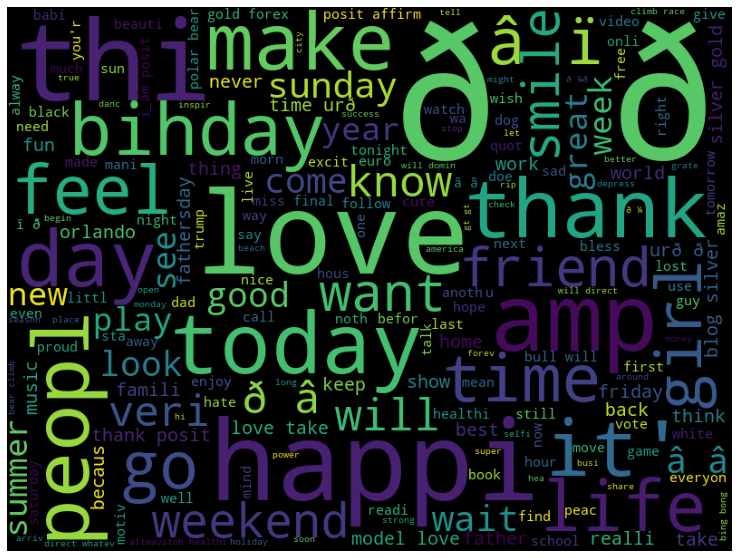

In [12]:
image=WordCloud(width=800, height=600, random_state=42, max_font_size=200).generate(all_word)   

#using matplot to show the fig
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.axis("off")
plt.show()

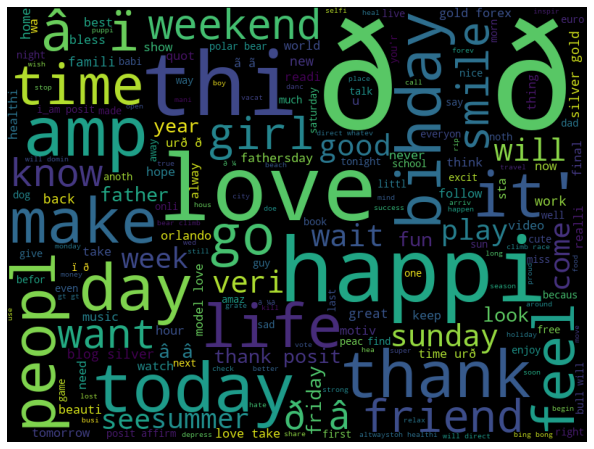

In [13]:
positive_word=" "
j=0
for sentences in df['clean_tweet']:
    if(df['label'][j]==0):
        positive_word=positive_word+" "+sentences
    j=j+1
positive_image=WordCloud(width=800, height=600, random_state=42, max_font_size=200).generate(positive_word)
#plotting
plt.figure(figsize=(13,8))
plt.imshow(positive_image)
plt.axis("off")
plt.show()

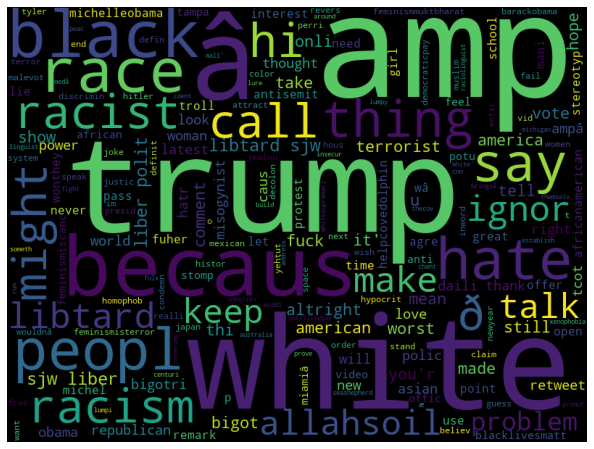

In [14]:
negative_word=" "
j=0
for sentences in df['clean_tweet']:
    if(df['label'][j]==1):
        negative_word=negative_word+" "+sentences
    j=j+1
negative_image=WordCloud(width=800, height=600, random_state=42, max_font_size=200).generate(negative_word)
#plotting
plt.figure(figsize=(13,8))
plt.imshow(negative_image)
plt.axis("off")
plt.show()

In [15]:
#extracting hastags
pos_hash=[]
pos=re.compile("#(\w+)")
j=0
for tweets in df['clean_tweet']:
    if(df['label'][j]==0):
        ht=pos.findall(tweets)
        pos_hash.append(ht)
    j=j+1    
pos_hash        
            

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['day', 'gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat',

In [16]:
neg_hash=[]
neg=re.compile("#(\w+)")
j=0
for tweets in df['clean_tweet']:
    if(df['label'][j]==1):
        ht=neg.findall(tweets)
        neg_hash.append(ht)
    j=j+1    
neg_hash        
            

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'whit

In [17]:
ht_positive=sum(pos_hash,[])
ht_negative=sum(neg_hash,[])
ht_positive
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'medâ',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'â',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflictâ',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt

In [18]:
from nltk.probability import FreqDist
pos=FreqDist(ht_positive)
d=pd.DataFrame({'hashtag':list(pos.keys()), 'count':list(pos.values())})
d.head()

,hashtag,count
0,run,2
1,lyft,1
2,disapoint,1
3,getthank,1
4,model,30


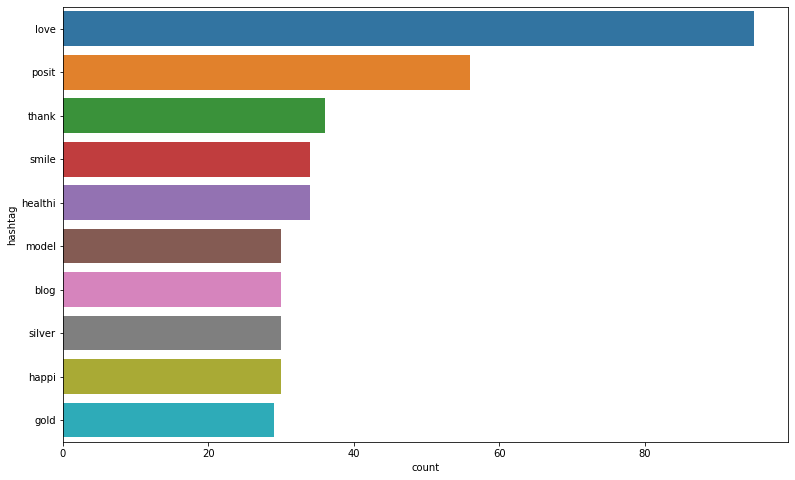

In [19]:
#making bar plot of top 10 positive words
data=d.nlargest(columns='count', n=10)
plt.figure(figsize=(13,8))
sns.barplot(data=data, x='count', y='hashtag')
plt.show()

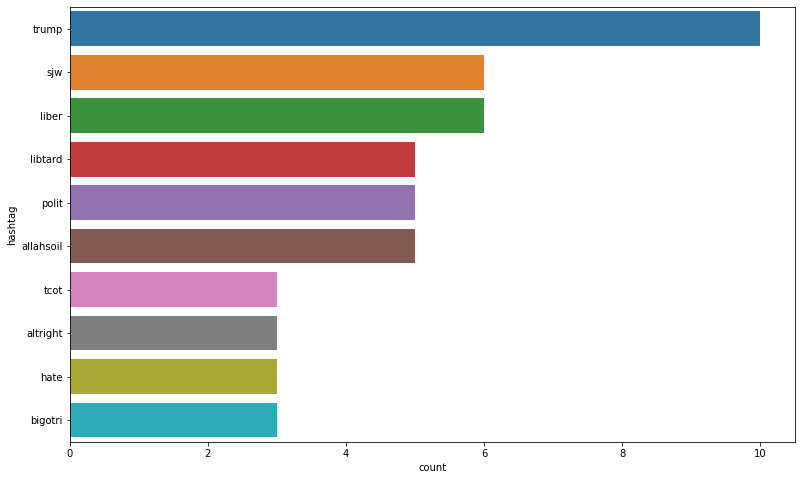

In [20]:
neg=FreqDist(ht_negative)
d=pd.DataFrame({'hashtag':list(neg.keys()),'count':list(neg.values())})
data=d.nlargest(columns='count', n=10)
plt.figure(figsize=(13,8))
sns.barplot(data=data, x='count', y='hashtag')
plt.show()

# Input split

In [21]:
#feature extraction using countvectorizer in sklearn
#basically countvectorizer will make a sparse matrix in which each row will represent a tweet
#and each column will represent a particular word and its frequency in that particular tweet
#that word may be present in other tweets and not in that particular tweet
#for more info study the gfg article

"""
Key Observations:

There are 12 unique words in the document, represented as columns of the table.
There are 3 text samples in the document, each represented as rows of the table.
Every cell contains a number, that represents the count of the word in that particular text.
All words have been converted to lowercase.
The words in columns have been arranged alphabetically.
ps-copied from gfg
"""

'\nKey Observations:\n\nThere are 12 unique words in the document, represented as columns of the table.\nThere are 3 text samples in the document, each represented as rows of the table.\nEvery cell contains a number, that represents the count of the word in that particular text.\nAll words have been converted to lowercase.\nThe words in columns have been arranged alphabetically.\n'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.9, min_df=3, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [23]:
#so a sparse matrix has been created 
#using stop_words all the stop words present in english has been removed
#if a word(feature) occurs in more than 90% of the data then it won't be considered because of max_df 
#if a word(feature) occurs in less than 3 rows of the data then it won't be considered because of min_df
#after all this the sparse matrix has been created
#bow[100].toarray()#this is the 100th row or the 100th tweet

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bow, df['clean_tweet'], test_size=0.25)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [26]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
pred=model.predict(X_test)
accuracy_score(y_test,pred)

0.04

In [28]:
f1_score(y_test,pred,average='macro')

0.012243566213956524